Connecting to API Key @ Coin Market Cap

In [58]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cab54d2a-0b4e-4897-8908-6b5f08775a39',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-24T21:26:05.071Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9926}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9634, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

Change Data Type | Normalize JSON | Add Timestamp

In [59]:
import pandas as pd
pd.set_option('display.max.columns', None)
pd.set_option('display.max_rows', None)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9634,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102293.00000,19102293.00000,nan,1,None,None,None,2022-07-24T21:24:00.000Z,22777.58998,22299566513.20179,-3.04830,0.30727,2.13835,8.49927,6.99724,-23.45737,-43.27184,435104197584.73907,41.55690,478329389528.23999,None,2022-07-24T21:24:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-24 21:26:08.404898
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",nan,121682519.37400,121682519.37400,nan,2,None,None,None,2022-07-24T21:23:00.000Z,1619.48337,15594993594.92390,7.56510,1.10681,6.31667,19.67847,32.52588,-17.26711,-46.04088,197062816962.57977,18.82510,197062816962.57999,None,2022-07-24T21:23:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-24 21:26:08.404898
2,825,Tether,USDT,tether,36592,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,65841277710.53098,68166976392.72330,nan,3,None,None,None,2022-07-24T21:23:00.000Z,1.00002,39751784035.47004,-4.16820,-0.00150,-0.00086,0.03118,0.06475,0.09930,-0.01282,65842594665.21970,6.28860,68168339865.95000,None,2022-07-24T21:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 21:26:08.404898
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,55096057831.29465,55096057831.29465,nan,4,None,None,None,2022-07-24T21:23:00.000Z,1.00022,4772628054.85864,-8.64620,0.01042,0.01560,0.01028,0.00407,-0.00639,0.01156,55107980001.62444,5.26350,55107980001.62000,None,2022-07-24T21:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 21:26:08.404898
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,nan,5,None,None,None,2022-07-24T21:23:00.000Z,263.56304,879328021.94383,-19.03660,0.47645,2.93071,5.63159,10.22528,-19.61227,-34.49873,42522538233.27164,4.06140,52712607051.82000,None,2022-07-24T21:23:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-24 21:26:08.404898
5,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,nan,6,None,None,None,2022-07-24T21:23:00.000Z,0.36369,883483222.10194,3.42360,0.54172,2.11926,4.19595,-0.61769,-10.67462,-47.31166,17582005777.01740,1.67930,36369213686.50000,None,2022-07-24T21:23:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-24 21:26:08.404898
6,4687,Binance USD,BUSD,binance-usd,4145,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",nan,17547224379.45926,17547224379.45926,nan,7,None,None,None,2022-07-24T21:23:00.000Z,1.00123,4469527718.53081,-0.28130,-0.00041,0.01412,0.00725,-0.07847,0.10238,0.24313,17568751461.32419,1.67800,17568751461.32000,None,2022-07-24T21:23:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 21:26:08.404898
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,nan,8,None,None,None,2022-07-24T21:23:00.000Z,0.51933,966731460.09408,35.00200,0.58663,3.22364,15.86811,3.42447,0.42575,-41.86429,17528708887.60786,1.67450,23369835693.27000,None,2022-07-24T21:23:00.000Z,nan,NaN,NaN,NaN,NaN,20

Define Function (api_runner)

In [60]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'10',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'cab54d2a-0b4e-4897-8908-6b5f08775a39',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'/Users/brucerehburg/Documents/Data/CoinMarketCapAPI.csv'):
        df.to_csv(r'/Users/brucerehburg/Documents/Data/CoinMarketCapAPI.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/brucerehburg/Documents/Data/CoinMarketCapAPI.csv', mode='a', header=False)

Create Automated Script (range set to 333; max number of calls per day)

In [61]:
import os
from time import time
from time import sleep

In [62]:
for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60)
exit()

{'status': {'timestamp': '2022-07-24T21:26:19.134Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9926}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9634, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

Visualize and Transform Data

In [64]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9634,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102293.00000,19102293.00000,nan,1,None,None,None,2022-07-24T21:26:00.000Z,22777.45800,22311249103.23664,-3.02170,0.26061,2.13924,8.44672,6.87411,-23.46444,-43.25843,435101676585.19769,41.55670,478326618081.35999,None,2022-07-24T21:26:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-24 21:27:19.422549
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",nan,121682519.37400,121682519.37400,nan,2,None,None,None,2022-07-24T21:25:00.000Z,1620.18840,15624890646.40657,7.78070,1.06915,6.38515,19.58761,32.56985,-17.23395,-46.05174,197148606903.83112,18.81580,197148606903.82999,None,2022-07-24T21:25:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-24 21:27:19.422549
2,825,Tether,USDT,tether,36592,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,65841277710.53098,68166976392.72330,nan,3,None,None,None,2022-07-24T21:25:00.000Z,1.00004,39789067123.68594,-4.09220,-0.00003,0.00256,0.03025,0.06203,0.09898,-0.01205,65843905757.26109,6.28880,68169697269.44000,None,2022-07-24T21:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 21:27:19.422549
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,55096057831.29465,55096057831.29465,nan,4,None,None,None,2022-07-24T21:25:00.000Z,1.00000,4748026766.32545,-9.08580,-0.01762,-0.00286,-0.01331,-0.02223,-0.02794,-0.02514,55096329160.04408,5.26240,55096329160.04000,None,2022-07-24T21:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 21:27:19.422549
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,nan,5,None,None,None,2022-07-24T21:25:00.000Z,263.60142,880653097.81101,-18.91130,0.45051,2.96565,5.58174,10.09832,-19.61704,-34.51970,42528730691.21413,4.06200,52720283465.69000,None,2022-07-24T21:25:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-24 21:27:19.422549
5,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,nan,6,None,None,None,2022-07-24T21:26:00.000Z,0.36377,883852542.04338,3.49420,0.49213,2.15876,4.17740,-0.63706,-10.71340,-47.28897,17585743866.56988,1.67820,36376946102.21000,None,2022-07-24T21:26:00.000Z,nan,NaN,NaN,NaN,NaN,2022-07-24 21:27:19.422549
6,4687,Binance USD,BUSD,binance-usd,4145,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",nan,17547224379.45926,17547224379.45926,nan,7,None,None,None,2022-07-24T21:25:00.000Z,1.00116,4474614726.96833,-0.21580,0.16969,0.21974,0.18776,0.14460,0.18016,0.02154,17567661882.13406,1.67790,17567661882.13000,None,2022-07-24T21:25:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 21:27:19.422549
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,nan,8,None,None,None,2022-07-24T21:25:00.000Z,0.51941,965239141.08725,33.83430,0.61394,3.45023,15.80803,3.33138,0.41413,-41.90745,17531328936.04557,1.67320,23373328825.70000,None,2022-07-24T21:25:00.000Z,nan,NaN,NaN,NaN,NaN,

In [65]:
df3 = df.groupby('name', sort=False)[[
    'quote.USD.percent_change_1h', 
    'quote.USD.percent_change_24h', 
    'quote.USD.percent_change_7d', 
    'quote.USD.percent_change_30d', 
    'quote.USD.percent_change_60d', 
    'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.26061,2.13924,8.44672,6.87411,-23.46444,-43.25843
Ethereum,1.06915,6.38515,19.58761,32.56985,-17.23395,-46.05174
Tether,-0.00003,0.00256,0.03025,0.06203,0.09898,-0.01205
USD Coin,-0.01762,-0.00286,-0.01331,-0.02223,-0.02794,-0.02514
BNB,0.45051,2.96565,5.58174,10.09832,-19.61704,-34.51970
XRP,0.49213,2.15876,4.17740,-0.63706,-10.71340,-47.28897
Binance USD,0.16969,0.21974,0.18776,0.14460,0.18016,0.02154
Cardano,0.61394,3.45023,15.80803,3.33138,0.41413,-41.90745
Solana,0.71630,4.16123,4.54071,-0.78352,-15.19648,-58.91434


In [66]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.26061
             quote.USD.percent_change_24h     2.13924
             quote.USD.percent_change_7d      8.44672
             quote.USD.percent_change_30d     6.87411
             quote.USD.percent_change_60d   -23.46444
             quote.USD.percent_change_90d   -43.25843
Ethereum     quote.USD.percent_change_1h      1.06915
             quote.USD.percent_change_24h     6.38515
             quote.USD.percent_change_7d     19.58761
             quote.USD.percent_change_30d    32.56985
             quote.USD.percent_change_60d   -17.23395
             quote.USD.percent_change_90d   -46.05174
Tether       quote.USD.percent_change_1h     -0.00003
             quote.USD.percent_change_24h     0.00256
             quote.USD.percent_change_7d      0.03025
             quote.USD.percent_change_30d     0.06203
             quote.USD.percent_change_60d     0.09898
             quote.USD.percent_change_90

In [67]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.26061
            quote.USD.percent_change_24h   2.13924
            quote.USD.percent_change_7d    8.44672
            quote.USD.percent_change_30d   6.87411
            quote.USD.percent_change_60d -23.46444
            quote.USD.percent_change_90d -43.25843
Ethereum    quote.USD.percent_change_1h    1.06915
            quote.USD.percent_change_24h   6.38515
            quote.USD.percent_change_7d   19.58761
            quote.USD.percent_change_30d  32.56985
            quote.USD.percent_change_60d -17.23395
            quote.USD.percent_change_90d -46.05174
Tether      quote.USD.percent_change_1h   -0.00003
            quote.USD.percent_change_24h   0.00256
            quote.USD.percent_change_7d    0.03025
            quote.USD.percent_change_30d   0.06203
            quote.USD.percent_change_60d   0.09898
            quote.USD.percent_change_90d  -0.01205
USD Coin    quote.USD.percent_change_1h   -0.01762
            quote.USD.percent_change_24h  -0.00286
            quote.USD.percent_change_7d   -0.01331
            quote.USD.percent_change_30d  -0.02223
            quote.USD.percent_change_60d  -0.02794
            quote.USD.percent_change_90d  -0.02514
BNB         quote.USD.percent_change_1h    0.45051
            quote.USD.percent_change_24h   2.96565
            quote.USD.percent_change_7d    5.58174
            quote.USD.percent_change_30d  10.09832
            quote.USD.percent_change_60d -19.61704
            quote.USD.percent_change_90d -34.51970
XRP         quote.USD.percent_change_1h    0.49213
            quote.USD.percent_change_24h   2.15876
            quote.USD.percent_change_7d    4.17740
            quote.USD.percent_change_30d  -0.63706
            quote.USD.percent_change_60d -10.71340
            quote.USD.percent_change_90d -47.28897
Binance USD quote.USD.percent_change_1h    0.16969
            quote.USD.percent_change_24h   0.21974
            quote.USD.percent_change_7d    0.18776
            quote.USD.percent_change_30d   0.14460
            quote.USD.percent_change_60d   0.18016
            quote.USD.percent_change_90d   0.02154
Cardano     quote.USD.percent_change_1h    0.61394
            quote.USD.percent_change_24h   3.45023
            quote.USD.percent_change_7d   15.80803
            quote.USD.percent_change_30d   3.33138
            quote.USD.percent_change_60d   0.41413
            quote.USD.percent_change_90d -41.90745
Solana      quote.USD.percent_change_1h    0.71630
            quote.USD.percent_change_24h   4.16123
            quote.USD.percent_change_7d    4.54071
            quote.USD.percent_change_30d  -0.78352
            quote.USD.percent_change_60d -15.19648
            quote.USD.percent_change_90d -58.91434
Dogecoin    quote.USD.percent_change_1h    0.39101
            quote.USD.percent_change_24h   1.49862
            quote.USD.percent_change_7d    6.72080
            quote.USD.percent_change_30d   1.34932
            quote.USD.percent_change_60d -17.89579
            quote.USD.percent_change_90d -56.86423

In [68]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.26061
1,Bitcoin,quote.USD.percent_change_24h,2.13924
2,Bitcoin,quote.USD.percent_change_7d,8.44672
3,Bitcoin,quote.USD.percent_change_30d,6.87411
4,Bitcoin,quote.USD.percent_change_60d,-23.46444
5,Bitcoin,quote.USD.percent_change_90d,-43.25843
6,Ethereum,quote.USD.percent_change_1h,1.06915
7,Ethereum,quote.USD.percent_change_24h,6.38515
8,Ethereum,quote.USD.percent_change_7d,19.58761
9,Ethereum,quote.USD.percent_change_30d,32.56985


In [69]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26061
1,Bitcoin,quote.USD.percent_change_24h,2.13924
2,Bitcoin,quote.USD.percent_change_7d,8.44672
3,Bitcoin,quote.USD.percent_change_30d,6.87411
4,Bitcoin,quote.USD.percent_change_60d,-23.46444
5,Bitcoin,quote.USD.percent_change_90d,-43.25843
6,Ethereum,quote.USD.percent_change_1h,1.06915
7,Ethereum,quote.USD.percent_change_24h,6.38515
8,Ethereum,quote.USD.percent_change_7d,19.58761
9,Ethereum,quote.USD.percent_change_30d,32.56985


In [70]:
df7['percent_change'] = df7['percent_change'].replace([
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'],
    ['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.26061
1,Bitcoin,24h,2.13924
2,Bitcoin,7d,8.44672
3,Bitcoin,30d,6.87411
4,Bitcoin,60d,-23.46444
5,Bitcoin,90d,-43.25843
6,Ethereum,1h,1.06915
7,Ethereum,24h,6.38515
8,Ethereum,7d,19.58761
9,Ethereum,30d,32.56985


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


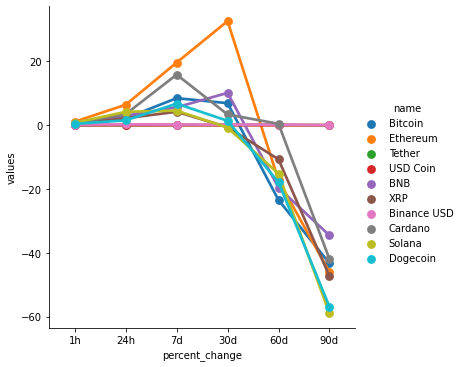

In [72]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')